<a href="https://colab.research.google.com/github/abhayaryan4u/Data-Science/blob/main/KNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from matplotlib import pyplot as plt

In [8]:
import numpy as np

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabeeb5b650>,
      dtype=object)

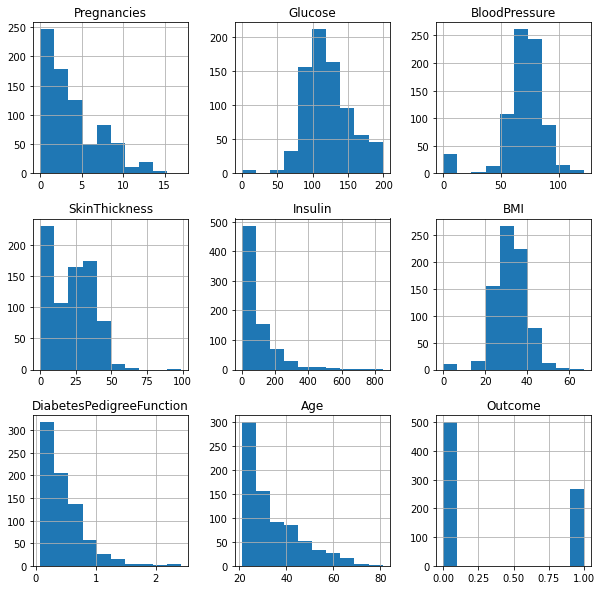

In [9]:
df.hist(figsize=(10,10))

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
cols=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in cols:
  df[col]=df[col].replace(0,np.NaN)
  df[col]=df[col].fillna(df[col].mean())

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabea981210>,
      dtype=object)

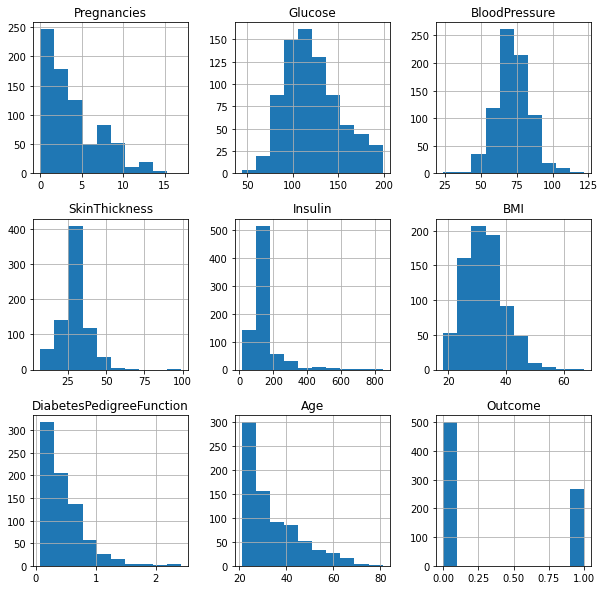

In [17]:
df.hist(figsize=(10,10))

In [18]:
x=df.iloc[:,0:8]

In [19]:
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [22]:
x_train

array([[-0.52723973,  0.24793345,  0.48356711, ...,  1.58713016,
         2.35307982, -0.17060015],
       [-0.52723973, -0.87645808,  0.31687784, ..., -0.12150579,
         0.58259316, -0.85916873],
       [-0.23105931, -0.81031741, -1.35001487, ..., -1.12916288,
         1.4909298 ,  0.51796842],
       ...,
       [-0.82342014,  0.74398853,  0.98363492, ...,  1.45569663,
         1.89737195, -0.9452398 ],
       [-0.82342014,  0.94241057, -0.34987925, ..., -0.45739149,
        -0.341139  ,  0.77618164],
       [ 1.84220358,  1.33925464, -0.34987925, ..., -1.01233308,
        -0.41195847,  1.20653699]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 9,metric= 'euclidean' )

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [25]:
pred= knn.predict(x_test)

In [26]:
pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7272727272727273

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        87
           1       0.75      0.57      0.64        67

    accuracy                           0.73       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.73      0.73      0.72       154

